<a href="https://colab.research.google.com/github/Chadliu123/TibameAI/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 46kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=38ce797c6dca0b32b9f089f9215087a4a339f8fad1453d2a9987da72aca4d23c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


新垣結衣: [-0.05064777  0.08911458  0.07220721 -0.0747238  -0.15251684  0.01727935
 -0.07398536 -0.04014336  0.17434734 -0.18036348  0.20311578 -0.11978777
 -0.20682791  0.02330047 -0.06314632  0.2517983  -0.1654802  -0.1785077
 -0.02713143  0.04689776  0.05586754  0.07972005 -0.05175014  0.04556344
 -0.07053669 -0.35533473 -0.10035212 -0.0175175  -0.01494157 -0.08169999
 -0.05835865  0.04357922 -0.14368352 -0.01423079  0.11742014  0.16344272
  0.00370013 -0.07568491  0.10814434 -0.00162116 -0.34038645  0.03993043
  0.14255586  0.24478447  0.16291207  0.09070328 -0.03884837 -0.17610626
  0.11103865 -0.17643823  0.09625775  0.15524687  0.12086408  0.13349447
  0.01946574 -0.17738636  0.03088253  0.17094877 -0.1200141   0.01340678
  0.11719596 -0.02324646  0.10791053 -0.09954397  0.21250485  0.03576033
 -0.12450792 -0.23144005  0.14117394 -0.19362681 -0.12673253  0.07958976
 -0.17173259 -0.20857921 -0.31325206  0.00388384  0.30287993  0.17407304
 -0.14994752  0.03109023  0.04615356  0.013120

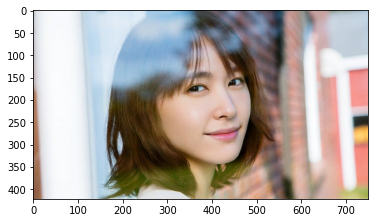

In [4]:
import face_recognition
import matplotlib.pyplot as plt

img = face_recognition.load_image_file("new.jpg")
en = face_recognition.face_encodings(img)[0]
print("新垣結衣:", en)
plt.imshow(img)

In [11]:
import glob
import os
formats = ["jpg", "png", "jpeg"]
fn = []
for f in formats:
    fn = fn + glob.glob("*.{}".format(f))
    fn = fn + glob.glob("*.{}".format(f.upper()))
encodings = []
names = []
for f in fn:
    try:
        img = face_recognition.load_image_file(f)
        en = face_recognition.face_encodings(img)[0]  
        encodings.append(en)
        n = os.path.basename(f).split(".")[0]
        names.append(n)
    except IndexError:
        print(f, "找不到人臉")
print(names)

['新垣結衣', '上戶彩', '石原聰美', '韓國瑜', '綾瀨遙']


網址:https://i0.wp.com/pocketjapan.tw/wp-content/uploads/2020/07/%E7%9F%B3%E5%8E%9F%E8%81%B0%E7%BE%8E-%E5%B0%81%E9%9D%A2-%E9%BB%98%E9%BB%98%E5%A5%89%E7%8D%BB%E7%9A%84%E7%81%B0%E5%A7%91%E5%A8%98%E8%97%A5%E5%B8%AB.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


新垣結衣 的距離: 0.5509105438792198
上戶彩 的距離: 0.49967478980720764
石原聰美 的距離: 0.34120800035460097
韓國瑜 的距離: 0.6615358414402899
綾瀨遙 的距離: 0.5353969740052976
最相近: 石原聰美
------------------------------


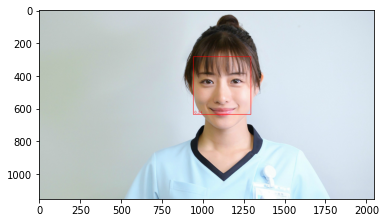

In [13]:
import cv2
import requests
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36"
}
url = input("網址:")
response = requests.get(url, headers=headers, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)

locs = face_recognition.face_locations(img, model="cnn")
ens = face_recognition.face_encodings(img, known_face_locations=locs)

for en, loc in zip(ens, locs):
    (top, right, bottom, left) = loc
    cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)
    distances = face_recognition.face_distance(en, encodings)
    for na, dis in zip(names, distances):
        print(na, "的距離:", dis)
    print("最相近:", names[distances.argmin()])
    print("-" * 30)
    font = cv2.FONT_HERSHEY_DUPLEX
    d = str(round(min(distances), 2))
    cv2.putText(img, d, (left + 6, bottom - 6), font, 0.7, (255, 0, 0), 1)

plt.imshow(img)